In [1]:
import sys
sys.path.insert(1, '/home/user/Research/base-WingWatch')

In [2]:
from WingWatch.Equipment import station
from WingWatch.Equipment import antenna
from WingWatch.Intersections import montecarlo
from WingWatch.Tools import translation
import pandas as pd
import numpy as np



In [3]:
#Setup each of the actual stations




BRR_Station = station.Station('BRR',41.1479, -71.5901)
BRR_Comp_Data = pd.read_csv('Fake_Calibration_Data.csv')


SEL_pos = translation.convert_back_to_lla([0,-200,0],BRR_Station.lat,BRR_Station.long,BRR_Station.alt)
TUR_pos = translation.convert_back_to_lla([100*np.sqrt(3),-100,0],BRR_Station.lat,BRR_Station.long,BRR_Station.alt)

a1 = antenna.Antenna('1','test',0,434)
a1.assign_pattern(BRR_Comp_Data)
BRR_Station.add_antenna(a1)

SEL_Station = station.Station('SEL',SEL_pos[0], SEL_pos[1])
SEL_Comp_Data = pd.read_csv('Fake_Calibration_Data.csv')

a1 = antenna.Antenna('1','test',0,434)
a1.assign_pattern(SEL_Comp_Data)
a1.convert_to_lat_long(SEL_Station)
SEL_Station.add_antenna(a1)


TUR_Station = station.Station('TUR',TUR_pos[0], TUR_pos[1])
TUR_Comp_Data = pd.read_csv('Fake_Calibration_Data.csv')


a1 = antenna.Antenna('1','test',0,434)
a1.assign_pattern(TUR_Comp_Data)
a1.convert_to_lat_long(TUR_Station)

TUR_Station.add_antenna(a1)


1 added to BRR's antennas.
1 added to SEL's antennas.
1 added to TUR's antennas.


In [4]:
data_BR = [[1,-92]]
data_SEL = [[1,-98]]
data_BIT = [[1,-81]]


data_to_send_through = [[data_BR,BRR_Station],[data_SEL,SEL_Station],[data_BIT,TUR_Station]]

In [5]:
points,index_map,station_shells = montecarlo.montecarlo_intersection(data_to_send_through,test=1)

In [6]:
import matplotlib.pyplot as plt

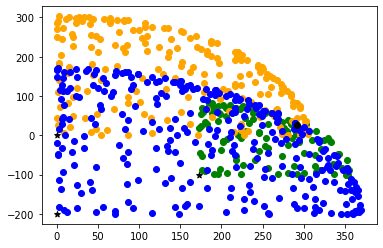

In [7]:
plt.scatter(station_shells[-1][:,0],station_shells[-1][:,1],color='green')
plt.scatter(station_shells[0][:,0],station_shells[0][:,1],color='orange')
plt.scatter(station_shells[1][:,0],station_shells[1][:,1],color='blue')
plt.scatter(0,0,marker='*',color='black',label='Station')
plt.scatter(0,-200,marker='*',color='black',label='Station')
plt.scatter(100*np.sqrt(3),-100,marker='*',color='black',label='Station')


plt.scatter(292,26,color="black",label='GPS Detection')

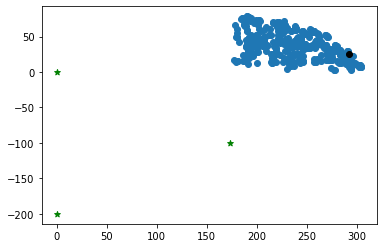

In [8]:
plt.scatter(points[index_map][:,0],points[index_map][:,1])
plt.scatter(292,26,color="black",label='GPS Detection')
#plt.xlim(-20000, 20000)
#plt.ylim(-10000, 10000)
plt.scatter(0,0,marker='*',color='green',label='Station')
plt.scatter(0,-200,marker='*',color='green',label='Station')
plt.scatter(100*np.sqrt(3),-100,marker='*',color='green',label='Station')
#plt.legend()

In [9]:
from WingWatch.Calibration import clean_data
from WingWatch.Tools import translation


In [10]:
cleaned_gps_data = clean_data.clean_gps_data_csv("GPS_Data_apr17_aug30_aug31_sep18_sep26_sep27_First.csv")
cleaned_tag_data = clean_data.clean_motus_Tag_data("allTagsAll390.csv",start_date="",end_date='2022-05-26',calibration_tags_list=[57265,57951,57952])


/home/user/Research/base-WingWatch/WingWatch/Calibration/clean_data.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gps_reduced_col['time'] = pd.to_datetime(df_gps_reduced_col['time']).astype(int) / 10**9
/home/user/Research/base-WingWatch/WingWatch/Calibration/clean_data.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_tags_only['port'] = port_cleaned


In [11]:
data_dataframe = clean_data.merge_gps_and_tag_data(cleaned_tag_data,cleaned_gps_data,stations_of_interest=['SE_Light_434','Black_Rock_434','BIWF_Turbine1'])

In [12]:
BIWF_Turbine_1_Ant1 = clean_data.generate_antenna_station_calib_file(data_dataframe,station_of_interest='BIWF_Turbine1',antenna=1,ref_lat = 41.1256, ref_long = -71.5075, ref_alt = 20)

In [13]:
station_dataframe = data_dataframe[data_dataframe.recvDeployName=='BIWF_Turbine1']

In [14]:
data_dataframe[data_dataframe.recvDeployName=='BIWF_Turbine1']

,tsCorrected,sig,port,recvDeployName,motusTagID,mfgID,Y,X,ele
1,1.630333e+09,-87.0,4,BIWF_Turbine1,57265,52666678,41.127259,-71.492894,0.1
2,1.630333e+09,-87.0,3,BIWF_Turbine1,57265,52666678,41.127259,-71.492894,0.1
7,1.630333e+09,-99.0,3,BIWF_Turbine1,57265,52666678,41.127268,-71.492897,0.1
8,1.630333e+09,-103.0,4,BIWF_Turbine1,57265,52666678,41.127268,-71.492897,0.1
13,1.630333e+09,-79.0,4,BIWF_Turbine1,57265,52666678,41.127270,-71.492897,0.1
...,...,...,...,...,...,...,...,...,...
210447,1.632763e+09,-81.0,3,BIWF_Turbine1,57952,4C34344B,41.233110,-71.512760,923.6
210448,1.632763e+09,-88.0,3,BIWF_Turbine1,57952,4C34344B,41.235730,-71.511970,923.6
210449,1.632763e+09,-84.0,3,BIWF_Turbine1,57952,4C34344B,41.237830,-71.511350,923.8
210450,1.632763e+09,-78.0,3,BIWF_Turbine1,57952,4C34344B,41.242520,-71.510000,924.2


In [15]:
antenna_dataframe = station_dataframe[station_dataframe.port == 1]

In [16]:
#turbine 1 location
ref_lat = 41.1256
ref_long = -71.5075
ref_alt = 20

result = antenna_dataframe.apply(lambda row: translation.XYZ_distance(ref_lat, ref_long, ref_alt, row['Y'], row['X'], row['ele']), axis=1)

In [17]:
df_test = pd.DataFrame(result.to_list(),columns=['X','Y','Z'])

In [18]:
df_test['sig'] = antenna_dataframe['sig'].to_list()

In [19]:
df_test

,X,Y,Z,sig
0,79.689836,247.322947,19.905304,-109.0
1,50.467512,235.550711,19.904559,-107.0
2,36.276191,226.999286,19.904152,-106.0
3,20.405389,215.671474,19.903688,-106.0
4,10.664553,209.896521,19.903471,-107.0
...,...,...,...,...
8744,-1318.030825,-1145.091494,-1204.561024,-105.0
8745,-1593.025941,-2560.150575,-1173.886448,-98.0
8746,-1596.563280,-3404.316350,-1143.489990,-99.0
8747,-1052.091914,-3967.418194,-899.476683,-96.0


In [20]:
import matplotlib.pyplot as plt

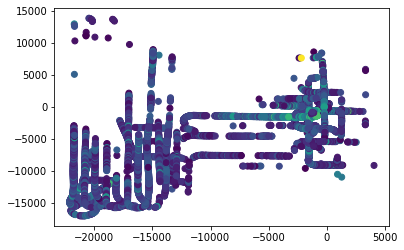

In [21]:
plt.scatter(df_test.X,df_test.Y,c=df_test.sig)

In [22]:
pwd|

'/home/user/Research/base-WingWatch'